# Welcome to Manim!

This is a temporary test environment in which you can play around with Manim without the need of installing it locally. Some basic knowledge of Python is helpful! Keep in mind that this is a *temporary* environment, though: your changes will not be saved and cannot be shared with others. To save your work, you will need to download the notebook file ("File > Download as > Notebook (.ipynb)"). Enjoy!

> *Useful resources:* [Documentation](https://docs.manim.community), [Discord](https://discord.gg/mMRrZQW), [Reddit](https://www.reddit.com/r/manim/)

## Setup

We begin our short walkthrough by importing everything from the library. Run the following code cell to do so (focus the cell and hit the *Run* button above, or press `Shift`+`Enter` – you can find more information about how to navigate and work with Jupyter notebooks in the *Help* menu at the top of this page).

The second line controls the maximum width used to display videos in this notebook, and the third line controls the verbosity of the log output. Feel free to adapt both of these settings to your liking.

In [2]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

If you have executed the cell successfully, a message printing the installed version of the library should have appeared below it.

## Your first Scene

Manim generates videos by rendering *Scenes*. These are special classes that have a `construct` method describing the animations that should be rendered. (For the sake of this tutorial it doesn't matter if you are not that familiar with Python or object-oriented programming terminology like *class* or *method* – but you should consider working through a Python tutorial if you want to keep learning Manim.)

Enough of fancy words, let us look at an example. Run the cell below to render and display a video.

In [4]:
%%manim -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

Manim Community v0.18.1

While parts of this example might seem self-explanatory, we'll still go over it step by step. First,
```
%%manim -qm CircleToSquare
```
is a *magic command*, it only works within Jupyter notebooks. It is very similar to how you would call `manim` from a terminal: The flag `-qm` controls the render quality, it is shorthand for `--quality=m`, medium rendering quality. This means that the video will be rendered in 720p with 30 fps. (Try to change it to `-qh` or `-ql` for *high* and *low* quality, respectively!)

Finally, `CircleToSquare` is the name of the scene class you want to render in this particular cell, which already brings us to the next few lines:
```py
class CircleToSquare(Scene):
    def construct(self):
        [...]
```
This defines a Manim scene named `CircleToSquare`, and defines a custom `construct` method which acts as the *blueprint* for the video. The content of the `construct` method describes what exactly is rendered in the video. 
```py
blue_circle = Circle(color=BLUE, fill_opacity=0.5)
green_square = Square(color=GREEN, fill_opacity=0.8)
```
The first two lines create a `Circle` and a `Square` object with the specified colors and fill opacities. However, these are not added to the scene yet! To do that, you either have to use `self.add`, or ...
```py
self.play(Create(blue_circle))
self.wait()
```
... by playing an animation that adds a Manim object (*Mobject*) to the scene. Within the method, `self` references the current scene, `self.play(my_animation)` can be read as "*This scene should play my animation.*" 

`Create` is such an animation, but there are many others (for example `FadeIn`, or `DrawBorderThenFill` – try them out above!). The `self.wait()` call does exactly what you would expect: it pauses the video for a while (by default: one second). Change it to `self.wait(2)` for a two-second pause, and so on.

The final two lines,
```
self.play(Transform(blue_circle, green_square))
self.wait()
```
are responsible for the actual transformation from the blue circle to the green square (plus a one second pause afterwards).

## Positioning Mobjects and moving them around

New problem: We want to create a scene in which a circle is created while simultaneously some text is written below it. We can reuse our blue circle from above, and then add some new code:

In [4]:
%%manim -qm HelloCircle

class HelloCircle(Scene):
    def construct(self):
        # blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        # We can also create a "plain" circle and add the desired attributes via set methods:
        circle = Circle()
        blue_circle = circle.set_color(BLUE).set_opacity(0.5)
        
        label = Text("A wild circle appears!")
        label.next_to(blue_circle, DOWN, buff=0.5)
        
        self.play(Create(blue_circle), Write(label))
        self.wait()

Manim Community v0.18.1

Apparently, text can be rendered by using a `Text` Mobject – and the desired position is achieved by the line
```py
label.next_to(blue_circle, DOWN, buff=0.5)
```
Mobjects have a few methods for positioning, `next_to` is one of them (`shift`, `to_edge`, `to_corner`, `move_to` are a few others – check them out in our [documentation](https://docs.manim.community/) by using the search bar on the left!). For `next_to`, the first argument that is passed (`blue_circle`) describes next to which object our `label` should be placed. The second argument, `DOWN`, describes the direction (try changing it to `LEFT`, `UP`, or `RIGHT` instead!). And finally, `buff=0.5` controls the "buffer distance" between `blue_circle` and `label`, increasing this value will push `label` further down.

But also note that the `self.play` call has been changed: it is possible to pass several animation arguments to `self.play`, they will then be played simultaneously. If you want to play them one after the other, replace the `self.play` call with the lines
```py
self.play(Create(blue_circle))
self.play(Write(label))
```
and see what happens.

By the way, Mobjects naturally also have non-positioning related methods: for example, to get our blue circle, we could also create a default one, and then set color and opacity:
```py
circle = Circle()
blue_transparent_circle = circle.set_color(BLUE)
blue_circle = blue_transparent_circle.set_opacity(0.5)
```
A shorter version of this would be
```py
blue_circle = Circle().set_color(BLUE).set_opacity(0.5)
```
For now, we will stick with setting the attributes directly in the call to `Circle`.

## Animating Method calls: the `.animate` syntax

In the last example we have encountered the `.next_to` method, one of many (!) methods that modify Mobjects in one way or the other. But what if we wanted to animate how a Mobject changes when one of these methods is applied, say, when we `.shift` something around, or `.rotate` a Mobject, or maybe `.scale` it? The `.animate` syntax is the answer to this question, let us look at an example.

In [5]:
%%manim -qm CircleAnnouncement

class CircleAnnouncement(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        announcement = Text("Let us draw a circle.")
        
        self.play(Write(announcement))
        self.wait()
        
        self.play(announcement.animate.next_to(blue_circle, UP, buff=0.5))
        self.play(Create(blue_circle))

Manim Community v0.18.1

Where we would normally use `announcement.next_to(blue_circle, UP, buff=0.5)` to position the text without animation, we can prepend `.animate` to the method call to turn the application of the method into an animation which can then be played using `self.play`. This works with all methods that modify a Mobject in some way:

In [ ]:
%%manim -qm AnimateSyntax

class AnimateSyntax(Scene):
    def construct(self):
        triangle = Triangle(color=RED, fill_opacity=1)
        self.play(DrawBorderThenFill(triangle))
        self.play(triangle.animate.shift(LEFT))
        self.play(triangle.animate.shift(RIGHT).scale(2))
        self.play(triangle.animate.rotate(PI/3))

In the first play call the triangle is created, in the second it is shifted to the left, then in the third it is shifted back to the right and simultaneously scaled by a factor of 2, and finally in the fourth call it is rotated by an angle of $\pi/3$. Run the cell above again after modifying some of the values, or trying other methods like, e.g., `set_color`).

When looking closely at the last animation from the scene above, the rotation, you might notice that this is not *actually* a rotation. The triangle is transformed to a rotated version of itself, but during the animation the vertices of the triangle don't move along an arc (as they would when the triangle was rotated around its center), but rather along straight lines, which gives the animation the impression that the triangle first shrinks a bit and then grows again.

This is actually **not a bug**, but a consequence of how the `.animate` syntax works: the animation is constructed by specifying the starting state (the `triangle` Mobject in the example above), and the final state (the rotated mobject, `triangle.rotate(PI/3)`). Manim then tries to interpolate between these two, but doesn't actually know that you would like to smoothly rotate the triangle. The following example illustrates this clearly:

In [ ]:
%%manim -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2*LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2*RIGHT)
        self.play(left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2)
        self.wait()

## Typesetting Mathematics

Manim supports rendering and animating LaTeX, the markup language mathematics is very often typeset in. Learn more about it [in this 30 minute tutorial](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes).

Here is a simple example for working with LaTeX in Manim:

In [ ]:
%%manim -qm CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

As this example demonstrates, `MathTex` allows to render simple (math mode) LaTeX strings. If you want to render "normal mode" LaTeX, use `Tex` instead.

Of course, Manim can also help you to visualize transformations of typeset formulae. Consider the following example:

In [ ]:
%%manim -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("42 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("42 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{42}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

In this last example, `eq1` and `eq2` have some double braces positions where, conventionally, there wouldn't be any in plain LaTeX. This is special Manim notation that groups the resulting `Tex` Mobjects `eq1` and `eq2` in a particular way.

This special notation is helpful when using the `TransformMatchingTex` animation: it will transform parts with equal TeX strings (for example, `a^2` to `a^2`) into each other – and without the special notation, the equation is considered to be one long TeX string. In comparison, `TransformMatchingShapes` is less smart: it simply tries to transform shapes that "look the same" into each other – nonetheless, it is still often very useful.

If you have made it this far, you should have a first impression of basic usage of the library. You can find a few more advanced examples that illustrate some more specialized concepts in the library below. Go ahead, try to play around and modify them just like you did for the ones above! Explore our [documentation](https://docs.manim.community) to get an idea about things that are already implemented – and look at the source code in case you want to build some more complex objects yourself.

The [community](https://www.manim.community/discord/) is certainly also happy to answer questions – and we hope you share your awesome projects with us! **Happy *manimating*!**

## Some more specialized examples

Before you delve right into these examples: please note that they illustrate specialized concepts, they are meant to give you a feeling for how more complex scenes are setup and coded. The examples don't come with additional explanation, they are **not intended as (entry level) learning resources**.

In [5]:
%%manim -qm FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

Manim Community v0.18.1

In [6]:
%%manim -qm PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.plot(lambda x: x**n, color=WHITE)
            plots += plot_axes.plot(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

Manim Community v0.18.1

In [ ]:
%%manim -qm ErdosRenyiGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ErdosRenyiGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))

In [ ]:
%%manim -qm CodeFromString

class CodeFromString(Scene):
    def construct(self):
        code = '''from manim import Scene, Square

class FadeInSquare(Scene):
    def construct(self):
        s = Square()
        self.play(FadeIn(s))
        self.play(s.animate.scale(2))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace")
        self.play(Write(rendered_code))
        self.wait(2)

In [ ]:
%%manim -qm OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

In [7]:
from manimlib import *
import numpy as np

# To watch one of these scenes, run the following:
# manimgl example_scenes.py OpeningManimExample
# Use -s to skip to the end and just save the final frame
# Use -w to write the animation to a file
# Use -o to write it to a file and open it once done
# Use -n <number> to skip ahead to the n'th animation of a scene.


class OpeningManimExample(Scene):
    def construct(self):
        intro_words = Text("""
            The original motivation for manim was to
            better illustrate mathematical functions
            as transformations.
        """)
        intro_words.to_edge(UP)

        self.play(Write(intro_words))
        self.wait(2)

        # Linear transform
        grid = NumberPlane((-10, 10), (-5, 5))
        matrix = [[1, 1], [0, 1]]
        linear_transform_words = VGroup(
            Text("This is what the matrix"),
            IntegerMatrix(matrix),
            Text("looks like")
        )
        linear_transform_words.arrange(RIGHT)
        linear_transform_words.to_edge(UP)
        linear_transform_words.set_backstroke(width=5)

        self.play(
            ShowCreation(grid),
            FadeTransform(intro_words, linear_transform_words)
        )
        self.wait()
        self.play(grid.animate.apply_matrix(matrix), run_time=3)
        self.wait()

        # Complex map
        c_grid = ComplexPlane()
        moving_c_grid = c_grid.copy()
        moving_c_grid.prepare_for_nonlinear_transform()
        c_grid.set_stroke(BLUE_E, 1)
        c_grid.add_coordinate_labels(font_size=24)
        complex_map_words = TexText("""
            Or thinking of the plane as $\\mathds{C}$,\\\\
            this is the map $z \\rightarrow z^2$
        """)
        complex_map_words.to_corner(UR)
        complex_map_words.set_backstroke(width=5)

        self.play(
            FadeOut(grid),
            Write(c_grid, run_time=3),
            FadeIn(moving_c_grid),
            FadeTransform(linear_transform_words, complex_map_words),
        )
        self.wait()
        self.play(
            moving_c_grid.animate.apply_complex_function(lambda z: z**2),
            run_time=6,
        )
        self.wait(2)


class AnimatingMethods(Scene):
    def construct(self):
        grid = Tex(R"\pi").get_grid(10, 10, height=4)
        self.add(grid)

        # You can animate the application of mobject methods with the
        # ".animate" syntax:
        self.play(grid.animate.shift(LEFT))

        # Both of those will interpolate between the mobject's initial
        # state and whatever happens when you apply that method.
        # For this example, calling grid.shift(LEFT) would shift the
        # grid one unit to the left, but both of the previous calls to
        # "self.play" animate that motion.

        # The same applies for any method, including those setting colors.
        self.play(grid.animate.set_color(YELLOW))
        self.wait()
        self.play(grid.animate.set_submobject_colors_by_gradient(BLUE, GREEN))
        self.wait()
        self.play(grid.animate.set_height(TAU - MED_SMALL_BUFF))
        self.wait()

        # The method Mobject.apply_complex_function lets you apply arbitrary
        # complex functions, treating the points defining the mobject as
        # complex numbers.
        self.play(grid.animate.apply_complex_function(np.exp), run_time=5)
        self.wait()

        # Even more generally, you could apply Mobject.apply_function,
        # which takes in functions form R^3 to R^3
        self.play(
            grid.animate.apply_function(
                lambda p: [
                    p[0] + 0.5 * math.sin(p[1]),
                    p[1] + 0.5 * math.sin(p[0]),
                    p[2]
                ]
            ),
            run_time=5,
        )
        self.wait()


class TextExample(Scene):
    def construct(self):
        # To run this scene properly, you should have "Consolas" font in your computer
        # for full usage, you can see https://github.com/3b1b/manim/pull/680
        text = Text("Here is a text", font="Consolas", font_size=90)
        difference = Text(
            """
            The most important difference between Text and TexText is that\n
            you can change the font more easily, but can't use the LaTeX grammar
            """,
            font="Arial", font_size=24,
            # t2c is a dict that you can choose color for different text
            t2c={"Text": BLUE, "TexText": BLUE, "LaTeX": ORANGE}
        )
        VGroup(text, difference).arrange(DOWN, buff=1)
        self.play(Write(text))
        self.play(FadeIn(difference, UP))
        self.wait(3)

        fonts = Text(
            "And you can also set the font according to different words",
            font="Arial",
            t2f={"font": "Consolas", "words": "Consolas"},
            t2c={"font": BLUE, "words": GREEN}
        )
        fonts.set_width(FRAME_WIDTH - 1)
        slant = Text(
            "And the same as slant and weight",
            font="Consolas",
            t2s={"slant": ITALIC},
            t2w={"weight": BOLD},
            t2c={"slant": ORANGE, "weight": RED}
        )
        VGroup(fonts, slant).arrange(DOWN, buff=0.8)
        self.play(FadeOut(text), FadeOut(difference, shift=DOWN))
        self.play(Write(fonts))
        self.wait()
        self.play(Write(slant))
        self.wait()


class TexTransformExample(Scene):
    def construct(self):
        # Tex to color map
        t2c = {
            "A": BLUE,
            "B": TEAL,
            "C": GREEN,
        }
        # Configuration to pass along to each Tex mobject
        kw = dict(font_size=72, t2c=t2c)
        lines = VGroup(
            Tex("A^2 + B^2 = C^2", **kw),
            Tex("A^2 = C^2 - B^2", **kw),
            Tex("A^2 = (C + B)(C - B)", **kw),
            Tex(R"A = \sqrt{(C + B)(C - B)}", **kw),
        )
        lines.arrange(DOWN, buff=LARGE_BUFF)

        self.add(lines[0])
        # The animation TransformMatchingStrings will line up parts
        # of the source and target which have matching substring strings.
        # Here, giving it a little path_arc makes each part rotate into
        # their final positions, which feels appropriate for the idea of
        # rearranging an equation
        self.play(
            TransformMatchingStrings(
                lines[0].copy(), lines[1],
                # matched_keys specifies which substring should
                # line up. If it's not specified, the animation
                # will align the longest matching substrings.
                # In this case, the substring "^2 = C^2" would
                # trip it up
                matched_keys=["A^2", "B^2", "C^2"],
                # When you want a substring from the source
                # to go to a non-equal substring from the target,
                # use the key map.
                key_map={"+": "-"},
                path_arc=90 * DEGREES,
            ),
        )
        self.wait()
        self.play(TransformMatchingStrings(
            lines[1].copy(), lines[2],
            matched_keys=["A^2"]
        ))
        self.wait()
        self.play(
            TransformMatchingStrings(
                lines[2].copy(), lines[3],
                key_map={"2": R"\sqrt"},
                path_arc=-30 * DEGREES,
            ),
        )
        self.wait(2)
        self.play(LaggedStartMap(FadeOut, lines, shift=2 * RIGHT))

        # TransformMatchingShapes will try to line up all pieces of a
        # source mobject with those of a target, regardless of the
        # what Mobject type they are.
        source = Text("the morse code", height=1)
        target = Text("here come dots", height=1)
        saved_source = source.copy()

        self.play(Write(source))
        self.wait()
        kw = dict(run_time=3, path_arc=PI / 2)
        self.play(TransformMatchingShapes(source, target, **kw))
        self.wait()
        self.play(TransformMatchingShapes(target, saved_source, **kw))
        self.wait()


class TexIndexing(Scene):
    def construct(self):
        # You can index into Tex mobject (or other StringMobjects) by substrings
        equation = Tex(R"e^{\pi i} = -1", font_size=144)

        self.add(equation)
        self.play(FlashAround(equation["e"]))
        self.wait()
        self.play(Indicate(equation[R"\pi"]))
        self.wait()
        self.play(TransformFromCopy(
            equation[R"e^{\pi i}"].copy().set_opacity(0.5),
            equation["-1"],
            path_arc=-PI / 2,
            run_time=3
        ))
        self.play(FadeOut(equation))

        # Or regular expressions
        equation = Tex("A^2 + B^2 = C^2", font_size=144)

        self.play(Write(equation))
        for part in equation[re.compile(r"\w\^2")]:
            self.play(FlashAround(part))
        self.wait()
        self.play(FadeOut(equation))

        # Indexing by substrings like this may not work when
        # the order in which Latex draws symbols does not match
        # the order in which they show up in the string.
        # For example, here the infinity is drawn before the sigma
        # so we don't get the desired behavior.
        equation = Tex(R"\sum_{n = 1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}", font_size=72)
        self.play(FadeIn(equation))
        self.play(equation[R"\infty"].animate.set_color(RED))  # Doesn't hit the infinity
        self.wait()
        self.play(FadeOut(equation))

        # However you can always fix this by explicitly passing in
        # a string you might want to isolate later. Also, using
        # \over instead of \frac helps to avoid the issue for fractions
        equation = Tex(
            R"\sum_{n = 1}^\infty {1 \over n^2} = {\pi^2 \over 6}",
            # Explicitly mark "\infty" as a substring you might want to access
            isolate=[R"\infty"],
            font_size=72
        )
        self.play(FadeIn(equation))
        self.play(equation[R"\infty"].animate.set_color(RED))  # Got it!
        self.wait()
        self.play(FadeOut(equation))


class UpdatersExample(Scene):
    def construct(self):
        square = Square()
        square.set_fill(BLUE_E, 1)

        # On all frames, the constructor Brace(square, UP) will
        # be called, and the mobject brace will set its data to match
        # that of the newly constructed object
        brace = always_redraw(Brace, square, UP)

        label = TexText("Width = 0.00")
        number = label.make_number_changable("0.00")

        # This ensures that the method deicmal.next_to(square)
        # is called on every frame
        label.always.next_to(brace, UP)
        # You could also write the following equivalent line
        # label.add_updater(lambda m: m.next_to(brace, UP))

        # If the argument itself might change, you can use f_always,
        # for which the arguments following the initial Mobject method
        # should be functions returning arguments to that method.
        # The following line ensures thst decimal.set_value(square.get_y())
        # is called every frame
        number.f_always.set_value(square.get_width)
        # You could also write the following equivalent line
        # number.add_updater(lambda m: m.set_value(square.get_width()))

        self.add(square, brace, label)

        # Notice that the brace and label track with the square
        self.play(
            square.animate.scale(2),
            rate_func=there_and_back,
            run_time=2,
        )
        self.wait()
        self.play(
            square.animate.set_width(5, stretch=True),
            run_time=3,
        )
        self.wait()
        self.play(
            square.animate.set_width(2),
            run_time=3
        )
        self.wait()

        # In general, you can alway call Mobject.add_updater, and pass in
        # a function that you want to be called on every frame.  The function
        # should take in either one argument, the mobject, or two arguments,
        # the mobject and the amount of time since the last frame.
        now = self.time
        w0 = square.get_width()
        square.add_updater(
            lambda m: m.set_width(w0 * math.sin(self.time - now) + w0)
        )
        self.wait(4 * PI)


class CoordinateSystemExample(Scene):
    def construct(self):
        axes = Axes(
            # x-axis ranges from -1 to 10, with a default step size of 1
            x_range=(-1, 10),
            # y-axis ranges from -2 to 2 with a step size of 0.5
            y_range=(-2, 2, 0.5),
            # The axes will be stretched so as to match the specified
            # height and width
            height=6,
            width=10,
            # Axes is made of two NumberLine mobjects.  You can specify
            # their configuration with axis_config
            axis_config=dict(
                stroke_color=GREY_A,
                stroke_width=2,
                numbers_to_exclude=[0],
            ),
            # Alternatively, you can specify configuration for just one
            # of them, like this.
            y_axis_config=dict(
                big_tick_numbers=[-2, 2],
            )
        )
        # Keyword arguments of add_coordinate_labels can be used to
        # configure the DecimalNumber mobjects which it creates and
        # adds to the axes
        axes.add_coordinate_labels(
            font_size=20,
            num_decimal_places=1,
        )
        self.add(axes)

        # Axes descends from the CoordinateSystem class, meaning
        # you can call call axes.coords_to_point, abbreviated to
        # axes.c2p, to associate a set of coordinates with a point,
        # like so:
        dot = Dot(color=RED)
        dot.move_to(axes.c2p(0, 0))
        self.play(FadeIn(dot, scale=0.5))
        self.play(dot.animate.move_to(axes.c2p(3, 2)))
        self.wait()
        self.play(dot.animate.move_to(axes.c2p(5, 0.5)))
        self.wait()

        # Similarly, you can call axes.point_to_coords, or axes.p2c
        # print(axes.p2c(dot.get_center()))

        # We can draw lines from the axes to better mark the coordinates
        # of a given point.
        # Here, the always_redraw command means that on each new frame
        # the lines will be redrawn
        h_line = always_redraw(lambda: axes.get_h_line(dot.get_left()))
        v_line = always_redraw(lambda: axes.get_v_line(dot.get_bottom()))

        self.play(
            ShowCreation(h_line),
            ShowCreation(v_line),
        )
        self.play(dot.animate.move_to(axes.c2p(3, -2)))
        self.wait()
        self.play(dot.animate.move_to(axes.c2p(1, 1)))
        self.wait()

        # If we tie the dot to a particular set of coordinates, notice
        # that as we move the axes around it respects the coordinate
        # system defined by them.
        f_always(dot.move_to, lambda: axes.c2p(1, 1))
        self.play(
            axes.animate.scale(0.75).to_corner(UL),
            run_time=2,
        )
        self.wait()
        self.play(FadeOut(VGroup(axes, dot, h_line, v_line)))

        # Other coordinate systems you can play around with include
        # ThreeDAxes, NumberPlane, and ComplexPlane.


class GraphExample(Scene):
    def construct(self):
        axes = Axes((-3, 10), (-1, 8), height=6)
        axes.add_coordinate_labels()

        self.play(Write(axes, lag_ratio=0.01, run_time=1))

        # Axes.get_graph will return the graph of a function
        sin_graph = axes.get_graph(
            lambda x: 2 * math.sin(x),
            color=BLUE,
        )
        # By default, it draws it so as to somewhat smoothly interpolate
        # between sampled points (x, f(x)).  If the graph is meant to have
        # a corner, though, you can set use_smoothing to False
        relu_graph = axes.get_graph(
            lambda x: max(x, 0),
            use_smoothing=False,
            color=YELLOW,
        )
        # For discontinuous functions, you can specify the point of
        # discontinuity so that it does not try to draw over the gap.
        step_graph = axes.get_graph(
            lambda x: 2.0 if x > 3 else 1.0,
            discontinuities=[3],
            color=GREEN,
        )

        # Axes.get_graph_label takes in either a string or a mobject.
        # If it's a string, it treats it as a LaTeX expression.  By default
        # it places the label next to the graph near the right side, and
        # has it match the color of the graph
        sin_label = axes.get_graph_label(sin_graph, "\\sin(x)")
        relu_label = axes.get_graph_label(relu_graph, Text("ReLU"))
        step_label = axes.get_graph_label(step_graph, Text("Step"), x=4)

        self.play(
            ShowCreation(sin_graph),
            FadeIn(sin_label, RIGHT),
        )
        self.wait(2)
        self.play(
            ReplacementTransform(sin_graph, relu_graph),
            FadeTransform(sin_label, relu_label),
        )
        self.wait()
        self.play(
            ReplacementTransform(relu_graph, step_graph),
            FadeTransform(relu_label, step_label),
        )
        self.wait()

        parabola = axes.get_graph(lambda x: 0.25 * x**2)
        parabola.set_stroke(BLUE)
        self.play(
            FadeOut(step_graph),
            FadeOut(step_label),
            ShowCreation(parabola)
        )
        self.wait()

        # You can use axes.input_to_graph_point, abbreviated
        # to axes.i2gp, to find a particular point on a graph
        dot = Dot(color=RED)
        dot.move_to(axes.i2gp(2, parabola))
        self.play(FadeIn(dot, scale=0.5))

        # A value tracker lets us animate a parameter, usually
        # with the intent of having other mobjects update based
        # on the parameter
        x_tracker = ValueTracker(2)
        f_always(
            dot.move_to,
            lambda: axes.i2gp(x_tracker.get_value(), parabola)
        )

        self.play(x_tracker.animate.set_value(4), run_time=3)
        self.play(x_tracker.animate.set_value(-2), run_time=3)
        self.wait()


class TexAndNumbersExample(Scene):
    def construct(self):
        axes = Axes((-3, 3), (-3, 3), unit_size=1)
        axes.to_edge(DOWN)
        axes.add_coordinate_labels(font_size=16)
        circle = Circle(radius=2)
        circle.set_stroke(YELLOW, 3)
        circle.move_to(axes.get_origin())
        self.add(axes, circle)

        # When numbers show up in tex, they can be readily
        # replaced with DecimalMobjects so that methods like
        # get_value and set_value can be called on them, and
        # animations like ChangeDecimalToValue can be called
        # on them.
        tex = Tex("x^2 + y^2 = 4.00")
        tex.next_to(axes, UP, buff=0.5)
        value = tex.make_number_changable("4.00")


        # This will tie the right hand side of our equation to
        # the square of the radius of the circle
        value.add_updater(lambda v: v.set_value(circle.get_radius()**2))
        self.add(tex)

        text = Text("""
            You can manipulate numbers
            in Tex mobjects
        """, font_size=30)
        text.next_to(tex, RIGHT, buff=1.5)
        arrow = Arrow(text, tex)
        self.add(text, arrow)

        self.play(
            circle.animate.set_height(2.0),
            run_time=4,
            rate_func=there_and_back,
        )

        # By default, tex.make_number_changable replaces the first occurance
        # of the number,but by passing replace_all=True it replaces all and
        # returns a group of the results
        exponents = tex.make_number_changable("2", replace_all=True)
        self.play(
            LaggedStartMap(
                FlashAround, exponents,
                lag_ratio=0.2, buff=0.1, color=RED
            ),
            exponents.animate.set_color(RED)
        )

        def func(x, y):
            # Switch from manim coords to axes coords
            xa, ya = axes.point_to_coords(np.array([x, y, 0]))
            return xa**4 + ya**4 - 4

        new_curve = ImplicitFunction(func)
        new_curve.match_style(circle)
        circle.rotate(angle_of_vector(new_curve.get_start()))  # Align
        value.clear_updaters()

        self.play(
            *(ChangeDecimalToValue(exp, 4) for exp in exponents),
            ReplacementTransform(circle.copy(), new_curve),
            circle.animate.set_stroke(width=1, opacity=0.5),
        )


class SurfaceExample(ThreeDScene):
    def construct(self):
        surface_text = Text("For 3d scenes, try using surfaces")
        surface_text.fix_in_frame()
        surface_text.to_edge(UP)
        self.add(surface_text)
        self.wait(0.1)

        torus1 = Torus(r1=1, r2=1)
        torus2 = Torus(r1=3, r2=1)
        sphere = Sphere(radius=3, resolution=torus1.resolution)
        # You can texture a surface with up to two images, which will
        # be interpreted as the side towards the light, and away from
        # the light.  These can be either urls, or paths to a local file
        # in whatever you've set as the image directory in
        # the custom_config.yml file

        # day_texture = "EarthTextureMap"
        # night_texture = "NightEarthTextureMap"
        day_texture = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Whole_world_-_land_and_oceans.jpg/1280px-Whole_world_-_land_and_oceans.jpg"
        night_texture = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/The_earth_at_night.jpg/1280px-The_earth_at_night.jpg"

        surfaces = [
            TexturedSurface(surface, day_texture, night_texture)
            for surface in [sphere, torus1, torus2]
        ]

        for mob in surfaces:
            mob.shift(IN)
            mob.mesh = SurfaceMesh(mob)
            mob.mesh.set_stroke(BLUE, 1, opacity=0.5)

        surface = surfaces[0]

        self.play(
            FadeIn(surface),
            ShowCreation(surface.mesh, lag_ratio=0.01, run_time=3),
        )
        for mob in surfaces:
            mob.add(mob.mesh)
        surface.save_state()
        self.play(Rotate(surface, PI / 2), run_time=2)
        for mob in surfaces[1:]:
            mob.rotate(PI / 2)

        self.play(
            Transform(surface, surfaces[1]),
            run_time=3
        )

        self.play(
            Transform(surface, surfaces[2]),
            # Move camera frame during the transition
            self.frame.animate.increment_phi(-10 * DEGREES),
            self.frame.animate.increment_theta(-20 * DEGREES),
            run_time=3
        )
        # Add ambient rotation
        self.frame.add_updater(lambda m, dt: m.increment_theta(-0.1 * dt))

        # Play around with where the light is
        light_text = Text("You can move around the light source")
        light_text.move_to(surface_text)
        light_text.fix_in_frame()

        self.play(FadeTransform(surface_text, light_text))
        light = self.camera.light_source
        self.add(light)
        light.save_state()
        self.play(light.animate.move_to(3 * IN), run_time=5)
        self.play(light.animate.shift(10 * OUT), run_time=5)

        drag_text = Text("Try moving the mouse while pressing d or f")
        drag_text.move_to(light_text)
        drag_text.fix_in_frame()

        self.play(FadeTransform(light_text, drag_text))
        self.wait()


class InteractiveDevelopment(Scene):
    def construct(self):
        circle = Circle()
        circle.set_fill(BLUE, opacity=0.5)
        circle.set_stroke(BLUE_E, width=4)
        square = Square()

        self.play(ShowCreation(square))
        self.wait()

        # This opens an iPython terminal where you can keep writing
        # lines as if they were part of this construct method.
        # In particular, 'square', 'circle' and 'self' will all be
        # part of the local namespace in that terminal.
        self.embed()

        # Try copying and pasting some of the lines below into
        # the interactive shell
        self.play(ReplacementTransform(square, circle))
        self.wait()
        self.play(circle.animate.stretch(4, 0))
        self.play(Rotate(circle, 90 * DEGREES))
        self.play(circle.animate.shift(2 * RIGHT).scale(0.25))

        text = Text("""
            In general, using the interactive shell
            is very helpful when developing new scenes
        """)
        self.play(Write(text))

        # In the interactive shell, you can just type
        # play, add, remove, clear, wait, save_state and restore,
        # instead of self.play, self.add, self.remove, etc.

        # To interact with the window, type touch().  You can then
        # scroll in the window, or zoom by holding down 'z' while scrolling,
        # and change camera perspective by holding down 'd' while moving
        # the mouse.  Press 'r' to reset to the standard camera position.
        # Press 'q' to stop interacting with the window and go back to
        # typing new commands into the shell.

        # In principle you can customize a scene to be responsive to
        # mouse and keyboard interactions
        always(circle.move_to, self.mouse_point)


class ControlsExample(Scene):
    drag_to_pan = False

    def setup(self):
        self.textbox = Textbox()
        self.checkbox = Checkbox()
        self.color_picker = ColorSliders()
        self.panel = ControlPanel(
            Text("Text", font_size=24), self.textbox, Line(),
            Text("Show/Hide Text", font_size=24), self.checkbox, Line(),
            Text("Color of Text", font_size=24), self.color_picker
        )
        self.add(self.panel)

    def construct(self):
        text = Text("text", font_size=96)

        def text_updater(old_text):
            assert(isinstance(old_text, Text))
            new_text = Text(self.textbox.get_value(), font_size=old_text.font_size)
            # new_text.align_data_and_family(old_text)
            new_text.move_to(old_text)
            if self.checkbox.get_value():
                new_text.set_fill(
                    color=self.color_picker.get_picked_color(),
                    opacity=self.color_picker.get_picked_opacity()
                )
            else:
                new_text.set_opacity(0)
            old_text.become(new_text)

        text.add_updater(text_updater)

        self.add(MotionMobject(text))

        self.textbox.set_value("Manim")
        # self.wait(60)
        # self.embed()




ModuleNotFoundError: No module named 'manimlib'

In [17]:
%%manim -qm DrawLineOnGrid


class DrawLineOnGrid(Scene):
    def construct(self):
        # Create a grid
        grid = NumberPlane(
            x_range=(-1, 2, 0.2), 
            y_range=(-1, 1, 0.2), 
            background_line_style={"stroke_color": BLUE_D, "stroke_width": 1}
        )
        
        # Add labels for the axes
        x_label = grid.get_x_axis_label(Tex("x"))
        y_label = grid.get_y_axis_label(Tex("y"))


        # Create two points
        point1 = Dot(point=grid.c2p(0, 0), color=RED)
        point2 = Dot(point=grid.c2p(1, 0), color=RED)

        # Create smaller text for the labels
        label1 = Text("(0, 0)", font_size=24).next_to(point1, DOWN)
        label2 = Text("(1, 0)", font_size=24).next_to(point2, DOWN)


        # Create a line between the two points
        line = Line(start=point1.get_center(), end=point2.get_center(), color=BLUE)

        # Add the grid and axis labels to the scene
        self.add(grid, x_label, y_label)
        
        # Add points and their labels to the scene
        self.play(GrowFromCenter(point1), GrowFromCenter(point2))
        self.play(Write(label1), Write(label2))

        # Draw the line between the points
        self.play(Create(line))

        # Wait for a moment to see the final scene
        self.wait(2)

# To render the scene, you can use the following command in your terminal:
# manim -pql draw_line_on_grid.py DrawLineOnGrid






Manim Community v0.18.1

In [19]:
%%manim -qm DrawLineOnGrid

class DrawLineOnGrid(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        # Create axes
        ax = Axes(
            x_range=[-1, 2, 0.2], 
            y_range=[-1, 1, 0.2], 
            axis_config={"include_numbers": False}
        )
        # Add axis labels
        x_label = ax.get_x_axis_label(Tex("x"))
        y_label = ax.get_y_axis_label(Tex("y"))

        # Create two points
        point1 = Dot(ax.c2p(0, 0), color=RED)
        point2 = Dot(ax.c2p(1, 0), color=RED)

        # Create smaller text for the labels
        label1 = Text("(0, 0)", font_size=24).next_to(point1, DOWN)
        label2 = Text("(1, 0)", font_size=24).next_to(point2, DOWN)

        # Create a blue line between the two points
        line = Line(start=point1.get_center(), end=point2.get_center(), color=BLUE)

        # Add the axes and axis labels to the scene
        self.add(ax, x_label, y_label)

        # Add points and their labels to the scene
        self.play(GrowFromCenter(point1), GrowFromCenter(point2))
        self.play(Write(label1), Write(label2))

        # Wait for a moment to see the points
        self.wait(2)

        # Zoom in on the line
        self.play(self.camera.frame.animate.scale(0.5).move_to(line.get_center()))

        # Draw the line between the points while zoomed in
        self.play(Create(line))

        # Wait for a moment to see the final scene
        self.wait(2)

        # Restore the original frame
        self.play(Restore(self.camera.frame))
        self.wait(2)




Manim Community v0.18.1

In [30]:
%%manim -qm PluckStringAnimation

import numpy as np
from manim import *

class PluckStringAnimation(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        # Create axes
        ax = Axes(
            x_range=[-1, 2, 0.2], 
            y_range=[-1, 1, 0.2], 
            axis_config={"include_numbers": False}
        )
        # Add axis labels
        x_label = ax.get_x_axis_label(Tex("x"))
        y_label = ax.get_y_axis_label(Tex("y"))

        # Create two points
        point1 = Dot(ax.c2p(0, 0), color=RED)
        point2 = Dot(ax.c2p(1, 0), color=RED)

        # Create smaller text for the labels
        label1 = Text("(0, 0)", font_size=24).next_to(point1, DOWN)
        label2 = Text("(1, 0)", font_size=24).next_to(point2, DOWN)

        # Create a straight line between the two points
        straight_line = Line(start=point1.get_center(), end=point2.get_center(), color=BLUE)

        # Create a curved line to represent the plucked string
        def plucked_string_func(x):
            return 0.4 * np.sin(np.pi * x)

        plucked_string = ax.plot(plucked_string_func, color=BLUE, x_range=[0, 1])

        # Add the axes, points, labels, and straight line to the scene
        self.add(ax, x_label, y_label, point1, point2, label1, label2, straight_line)

        # Transition to the plucked string
        self.play(Transform(straight_line, plucked_string))
        
        # Animate the plucked string vibrating
        vibrating_string = plucked_string.copy()
        def update_string(mob, dt):
            mob.become(ax.plot(lambda x: 0.4 * np.sin(np.pi * x) * np.cos(2 * self.renderer.time), color=BLUE, x_range=[0, 1]))

        vibrating_string.add_updater(update_string)
        
        # Replace the original plucked string with the vibrating string
        self.remove(straight_line)
        self.play(Transform(plucked_string, vibrating_string))
        self.remove(plucked_string)
        self.add(vibrating_string)
        
        # Wait for the vibration animation
        self.wait(4)

        # Restore the original frame
        self.play(Restore(self.camera.frame))
        self.wait(2)


Manim Community v0.18.1

In [ ]:
%%manim -qm PluckStringAnimation

import numpy as np
from manim import *

class PluckStringAnimation(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        # Create axes
        ax = Axes(
            x_range=[-1, 2, 0.2], 
            y_range=[-1, 1, 0.2], 
            axis_config={"include_numbers": False}
        )
        # Add axis labels
        x_label = ax.get_x_axis_label(Tex("x"))
        y_label = ax.get_y_axis_label(Tex("y"))

        # Create two points
        point1 = Dot(ax.c2p(0, 0), color=RED)
        point2 = Dot(ax.c2p(1, 0), color=RED)

        # Create smaller text for the labels
        label1 = Text("(0, 0)", font_size=24).next_to(point1, DOWN)
        label2 = Text("(1, 0)", font_size=24).next_to(point2, DOWN)

        # Create a straight line between the two points
        straight_line = Line(start=point1.get_center(), end=point2.get_center(), color=BLUE)

        # Create a curved line to represent the plucked string
        def plucked_string_func(x):
            return 0.4 * np.sin(np.pi*2*x)

        plucked_string = ax.plot(plucked_string_func, color=BLUE, x_range=[0, 1])

        # Add the axes, points, labels, and straight line to the scene
        self.add(ax, x_label, y_label, point1, point2, label1, label2, straight_line)

        # Transition to the plucked string
        self.play(Transform(straight_line, plucked_string))
        
        # Animate the plucked string vibrating
        vibrating_string = plucked_string.copy()
        def update_string(mob, dt):
            mob.become(ax.plot(lambda x: 0.4 * np.sin(np.pi*2*x) * np.cos(2 * self.renderer.time), color=BLUE, x_range=[0, 1]))

        vibrating_string.add_updater(update_string)
        
        # Replace the original plucked string with the vibrating string
        self.remove(straight_line)
        self.play(Transform(plucked_string, vibrating_string))
        self.remove(plucked_string)
        self.add(vibrating_string)
        
        # Wait for the vibration animation
        self.wait(4)

        # Restore the original frame
        self.play(Restore(self.camera.frame))
        self.wait(2)


Manim Community v0.18.1

Waiting 2:  88%|████████▊ | 105/120 [00:09<00:01, 10.06it/s]                               

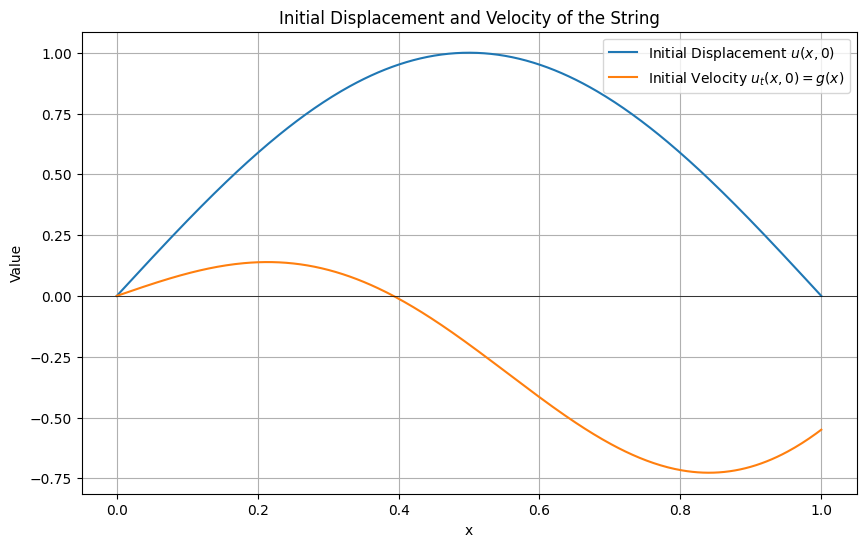

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x range
x = np.linspace(0, 1, 400)

# Initial displacement (assumed to be positive for this example)
u0 = np.sin(np.pi * x)  # Example positive displacement

# Initial velocity
g = np.sin(x) * np.cos(4 * x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, u0, label=r'Initial Displacement $u(x, 0)$')
plt.plot(x, g, label=r'Initial Velocity $u_t(x, 0) = g(x)$')
plt.axhline(0, color='black',linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.title('Initial Displacement and Velocity of the String')
plt.grid(True)
plt.show()


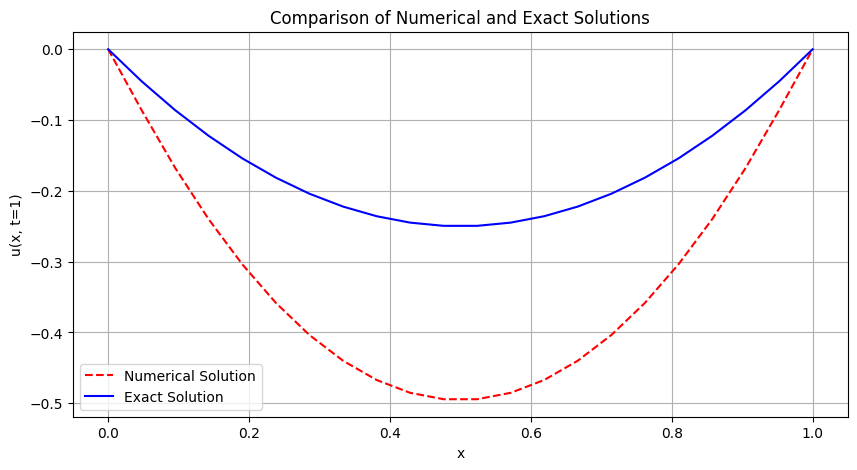

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0
T = 1.0
Nx = 20
Nt = 20
dx = L / (Nx)
dt = T / Nt
x = np.linspace(0, L, Nx + 2)
t = np.linspace(0, T, Nt + 1)
r = (dt / dx)**2

# Initial conditions
v = np.zeros((Nt + 1, Nx + 2))
v[0, 1:Nx+1] = x[1:Nx+1] * (1 - x[1:Nx+1])

# Applying the finite difference scheme
for n in range(1, Nt):
    for j in range(1, Nx + 1):
        v[n + 1, j] = 2 * v[n, j] - v[n - 1, j] + r * (v[n, j + 1] - 2 * v[n, j] + v[n, j - 1])

# Exact solution (using the first 20 terms for approximation)
def exact_solution(x, t):
    u = np.zeros_like(x)
    for k in range(1, 21):
        term = (8 / (np.pi**3 * (2 * k - 1)**3)) * np.sin((2 * k - 1) * np.pi * x) * np.cos((2 * k - 1) * np.pi * t)
        u += term
    return u

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(x, v[-1, :], 'r--', label='Numerical Solution')
plt.plot(x, exact_solution(x, T), 'b-', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x, t=1)')
plt.title('Comparison of Numerical and Exact Solutions')
plt.legend()
plt.grid()
plt.show()


#3dimension graph

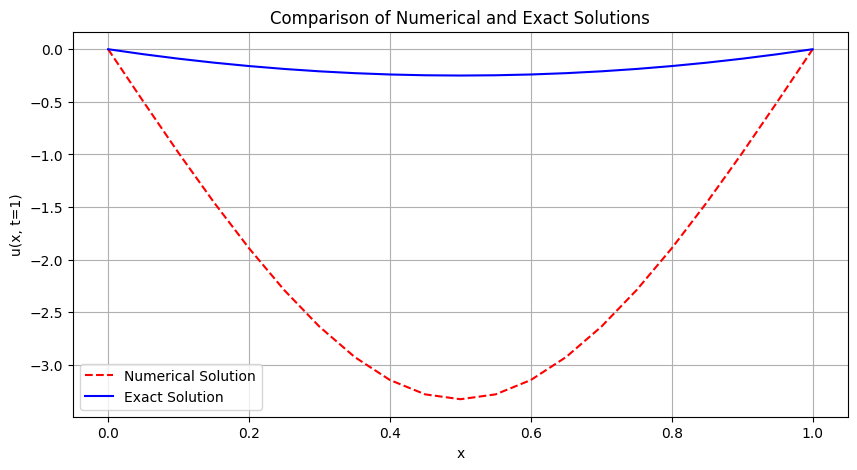

In [5]:
%%manim -qm TwoDToThreeDGraph

from manim import *

class TwoDToThreeDGraph(ThreeDScene):
    def construct(self):
        # Create 2D axes
        axes = ThreeDAxes(
            x_range=[0, 10, 1],
            y_range=[0, 2, 0.5],
            z_range=[0, 2, 0.5],
            axis_config={"color": BLUE}
        )

        # Create a sine wave plot
        sine_wave = axes.plot(lambda x: np.sin(x), color=RED, x_range=[0, 10])

        # Add 2D elements to the scene
        self.add(axes, sine_wave)

        # Set the initial camera orientation to show the 2D graph
        self.set_camera_orientation(phi=90 * DEGREES, theta=0 * DEGREES)

        # Wait for a moment to display the 2D graph
        self.wait(2)

        # Animate the camera to show a slight 3D perspective
        self.move_camera(phi=75 * DEGREES, theta=-45 * DEGREES, run_time=3)

        # Add a third axis label to emphasize the 3D effect
        z_label = axes.get_z_axis_label(Tex("z"))
        self.add(z_label)

        # Wait to show the final perspective
        self.wait(2)
